# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 


## Get the Data


*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*





In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [6]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargoyahoo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [8]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

#### A list of the ticker symbols (as strings) in alphabetical order. Calling this list: tickers

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

#### Setting the column name levels

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [12]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

# EDA


** The max Close price for each bank's stock throughout the time period **

In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** A new Empty DataFrame called 'returns'. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

#### We can use pandas pct_change() method on the Close column to create a column representing this return value.

 #### Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

#### Creating a pairplot using seaborn of the returns dataframe

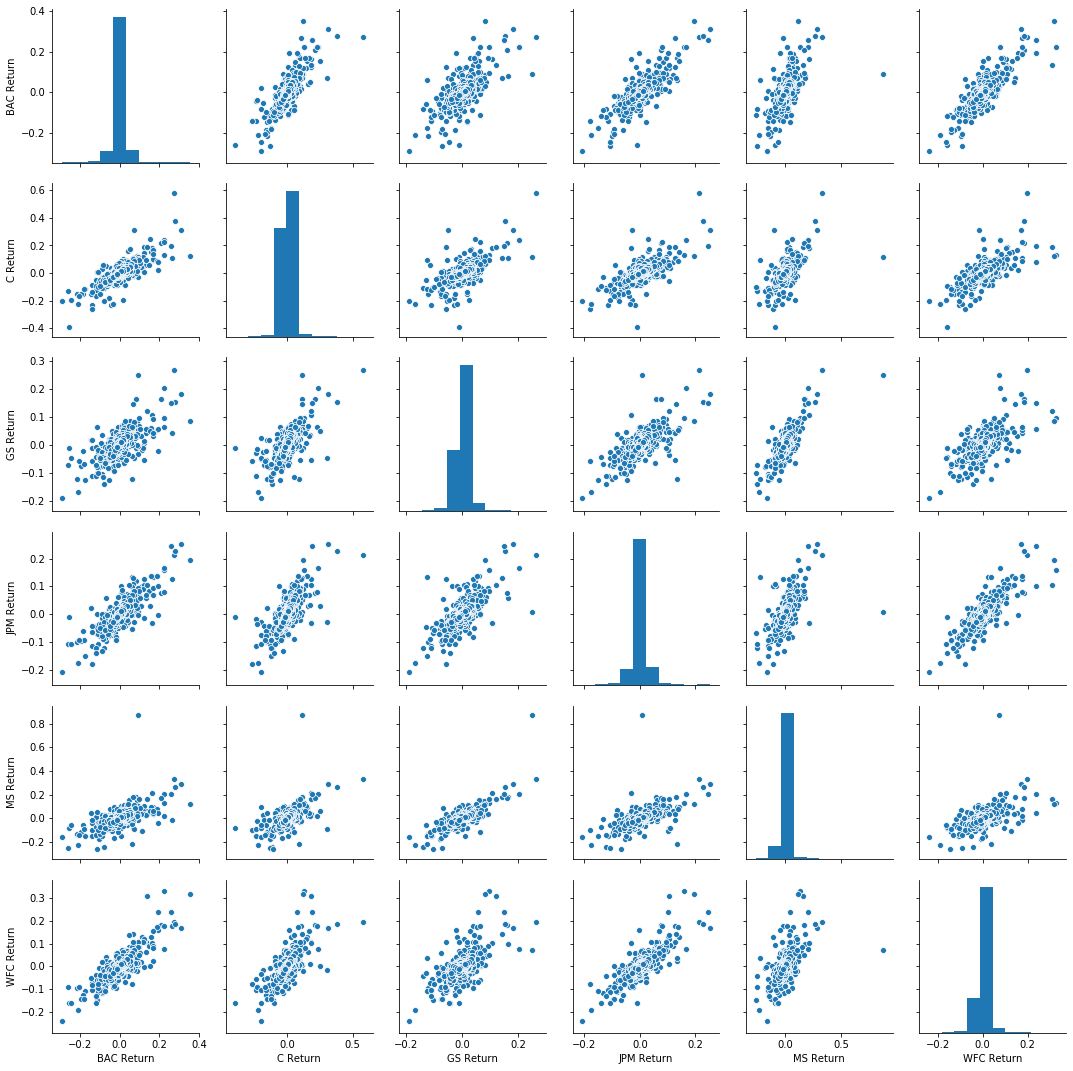

In [18]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

#### You'll also see the enormous crash in value if you take a look a the stock price plot

#### Figuring out on what dates each bank stock had the best and worst single day returns.

In [19]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

#### 4 of the banks share the same day for the worst drop(SEEN ABOVE),Also notice that Citigroup's largest drop and biggest gain were very close to one another, this means something significant happen in that time frame

#### Check here if intrested what Acually Happened:
[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [21]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

#### Standard deviation of the returns

In [22]:
returns.std() # Citigroup riskiest as seen below

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [36]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

#### Creating a distplot using seaborn of the 2015 returns for Morgan Stanley 

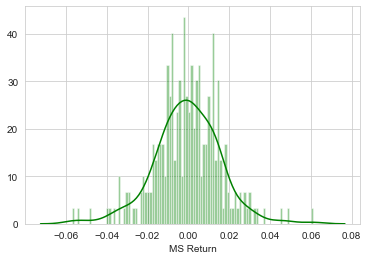

In [37]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

#### Creating a distplot using seaborn of the 2008 returns for CitiGroup 

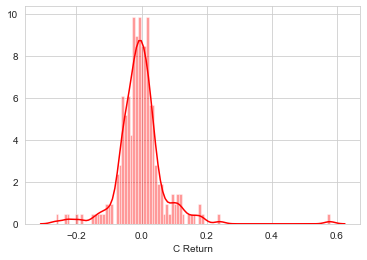

In [35]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization


### Imports

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Creating a line plot showing Close price for each bank for the entire index of time,using a for loop, or use [.xs] to get a cross section of the data.

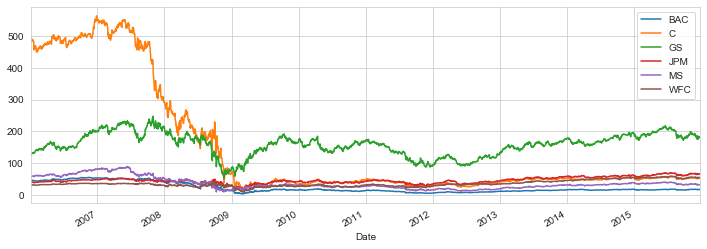

In [28]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

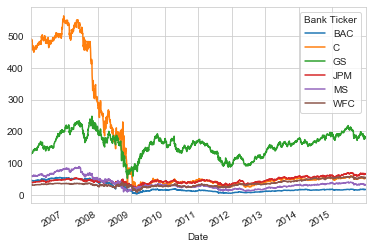

In [29]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

### Analyzing the moving averages for these stocks in the year 2008. 

#### HERE, I am Plotting the rolling(using .rolling() ) 30 day average against the Close Price for Bank Of America's stock for the year 2008

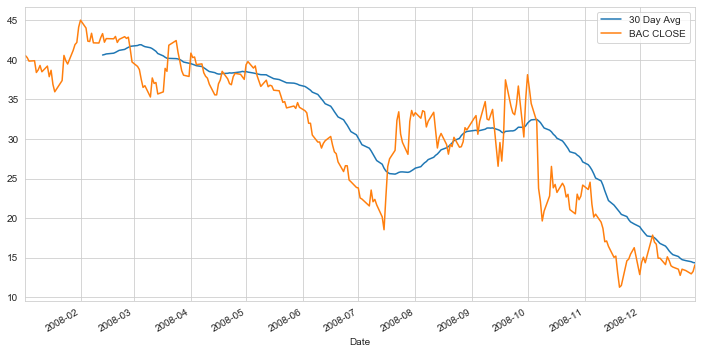

In [34]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

#### Now here creating heatmap of the correlation between the stocks Close Price.

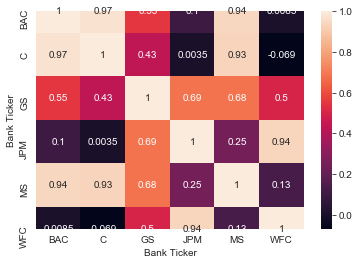

In [31]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

#### Using seaborn's clustermap to cluster the correlations together,meaning same correlation will be clustered together,CHECK DOCUMENTATION for further idea about sns.clustermap()

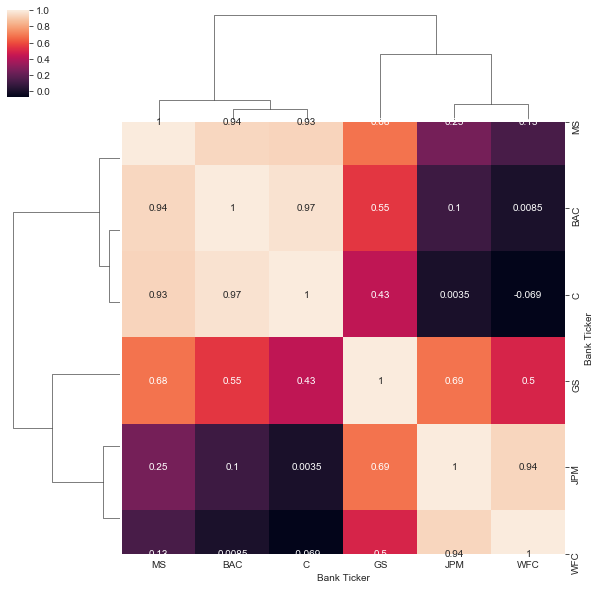

In [32]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

#### KeyNote:
   #### I took time in making this Visualisation Capstone Project
   #### I have seen more methods for visualisation and on DataFrame(in matplotlib,seaborn and pandas)
   #### I was mainly concerned with understanding and representing the basic pandas and visualization operations,which I have learned from 'Data Analysis with Python: Zero to Pandas' at 'JOVIAN.ML'

http://localhost:8888/notebooks/zerotopandas-course-project-starter/Finance%20Project%20(JOVIAN%20FINAL%20CAPSTONE%20PROJECT).ipynb